## 1.图片集读入并保存到tfrecord文件中
### 1.1 现将图片resize为（24，48）

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
import random

def images_convert(use='tfrecord'):
    rst = []
    # 数字
    # path
    path_initial = '../车牌字符识别训练数据/数字/'
    for i in range(10):
        path_mi = str(i)
        path = path_initial + path_mi + '/*.*'
        for jpgfile in glob.glob(path):
            img = Image.open(jpgfile)
            # resize图片
            new_img = img.resize((24, 48), Image.BILINEAR)
            # 将图片转化为灰度图
            gray = new_img.convert('L')
            # reshape 读取
            gray = np.array(gray, dtype='uint8')
            gray = gray.reshape(48, 24)
            # # 读取
            # fig = plt.figure()
            # plotwindow = fig.add_subplot(111)
            # plt.imshow(gray, cmap='gray')    
            # plt.show()
            # reshape 存储
            gray = gray.reshape(1152,)
            gray = gray.tolist()   # numpy -> list
            gray.insert(0, i)
            # 保存
            rst.append(gray)
    print('num OK!')
    # 字母
    path_initial = '../车牌字符识别训练数据/字母/'
    for i in range(26):
        path_mi = chr(65+i)
        path = path_initial + path_mi + '/*.*'
        for jpgfile in glob.glob(path):
            img = Image.open(jpgfile)
            # resize图片
            new_img = img.resize((24, 48), Image.BILINEAR)
            # 将图片转化为灰度图
            gray = new_img.convert('L')
            # reshape 读取
            gray = np.array(gray, dtype='uint8')
            gray = gray.reshape(48, 24)
            # # 读取
            # fig = plt.figure()
            # plotwindow = fig.add_subplot(111)
            # plt.imshow(gray, cmap='gray')    
            # plt.show()
            # reshape 存储
            gray = gray.reshape(1152,)
            gray = gray.tolist()   # numpy -> list
            gray.insert(0, 65+i)
            # 保存
            rst.append(gray)
    print('letter OK!')
    random.shuffle(rst)
    rst = np.array(rst)
    np.reshape(rst, (-1, 1153))
    rst = rst.astype('uint8')
    # 选择  输出
    if use == 'tfrecord':
        return rst[:10856], rst[10856:]
    else:
        return rst


# data = images_convert()
# for i in range(len(data)):
#     print(data[i].shape[0])

### 1.2 将resize后的图片存入tfrecord文件

In [3]:
import tensorflow as tf
from PIL import Image
import numpy
import  matplotlib.pyplot as plt



# 读取数据
print('loading data...')
data = images_convert()  # 分别读出训练集和验证集

# 转为tfrecord文件
config = ['train', 'validation']
for each in range(len(config)):
    mnist_type = config[each]
    # tfrecord格式文件名
    with tf.python_io.TFRecordWriter('images_' + mnist_type + '.tfrecords') as writer:
        image_path = data[each]
        for num_image in range(image_path.shape[0]):
            image = Image.fromarray(data[each][num_image][1:].reshape(48, 24))
            # print(data[each].images[num_images].reshape(28,28))
            # fig = plt.figure()
            # plotwindow = fig.add_subplot(111)
            # print(image)
            # plt.imshow(image, cmap='gray')    # cmap  图像为灰度图
            # plt.show()
            image_byte = image.tobytes()
            label = data[each][num_image][0]
            example = tf.train.Example(features=tf.train.Features(feature={  
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[int(label)])),  
                    'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_byte]))  
                }))
            writer.write(example.SerializeToString())
print('successful')

loading data...
num OK!
letter OK!
successful


## 2. 统计每类字符的数量与比例并利用图表展示(直方图、饼状图)

num OK!
letter OK!


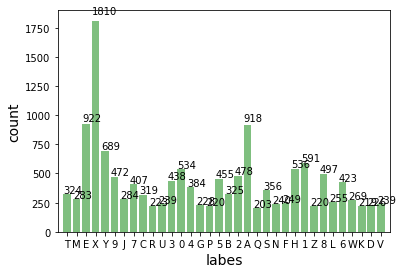

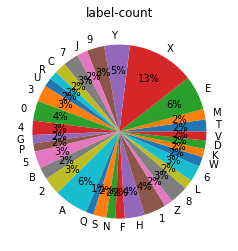

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# 函数
def data_dict(data):
    dict_rst = {}
    for i in range(data.shape[0]):
        if data[i][0] > 10:
            k = chr(data[i][0])
        else:
            k = data[i][0]
        dict_rst[k] = dict_rst.get(k, 0) + 1

    return dict_rst
# 展示
# 读取数据
# train, validation = images_convert()
# # train
# dict_train = data_dict(train)
# labels_train = tuple(dict_train.keys())
# count_train = np.array(list(dict_train.values()))
# # validation
# dict_validation = data_dict(validation)
# labels_validation = tuple(dict_validation.keys())
# count_validation = np.array(list(dict_validation.values()))

# x = np.arange(len(labels_train))   # 共用

# plt.figure()
# ax1 = plt.axes([0.16, 0.12, 0.77, 0.77])

# rects1 = ax1.bar(x, count_train, align='center', color='b', alpha=0.5, edgecolor='white')
# rects2 = ax1.bar(x, -count_validation, align='center', color='y', alpha=0.5, edgecolor='white')
# # 标数
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         if height < 0:
#             plt.text(rect.get_x(), 1.03*height, '%s' % int(-height))
#         else:
#             plt.text(rect.get_x(), 1.03*height, '%s' % int(height))
# autolabel(rects1)
# autolabel(rects2)
# plt.xlim(-1, 34)
# plt.xlabel('labes', size=14, color='k')
# plt.ylabel('count', size=14, color='k')
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels_train)

# plt.show()



# 任务
# 直方图
data = images_convert('renwu')

dict_data = data_dict(data)
labels_data = tuple(dict_data.keys())
count_data = np.array(list(dict_data.values()))

x = np.arange(len(labels_data))   

plt.figure()
ax1 = plt.axes([0.16, 0.12, 0.77, 0.77])

rects = ax1.bar(x, count_data, align='center', color='g', alpha=0.5)
# 标数
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height < 0:
            plt.text(rect.get_x(), 1.03*height, '%s' % int(-height))
        else:
            plt.text(rect.get_x(), 1.03*height, '%s' % int(height))
autolabel(rects)
plt.xlim(-1, 34)
plt.xlabel('labes', size=14, color='k')
plt.ylabel('count', size=14, color='k')
ax1.set_xticks(x)
ax1.set_xticklabels(labels_data)

plt.show()


# pie
 
plt.axes(aspect = 1)#使x y轴比例相同
 
plt.pie(x=count_data, labels=labels_data, autopct='%.0f%%', pctdistance=0.7)#autopct显示百分比
plt.title('label-count')
plt.show()

## 3. 从tfrecord文件读取数据，做批次处理

In [5]:
import  matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np

def read_tfrecord(config_dir, num=1):   
    # 读取tfrecord代码      
    filename_queue = tf.train.string_input_producer([config_dir])    # 创建输入队列，读入流中
    reader = tf.TFRecordReader()
    _, example = reader.read(filename_queue)  # 返回文件名和文件

    # 取出包含有image 和 label的feature对象
    features = tf.parse_single_example(example,
                                        features={'label': tf.FixedLenFeature([], tf.int64),
                                                    'data': tf.FixedLenFeature([], tf.string)})  # 将对应的内存块读为张量流
    image = tf.decode_raw(features['data'], tf.uint8)  # tf.decode_raw可以将字符串解析成图像对应的像素组
    image = tf.cast(image, tf.float32)    # 解码之后转数据类型 
    image = tf.reshape(image, [48, 24])
    label = tf.cast(features['label'], tf.int32)  # 类型转换
    # 随机读取数据，验证图片对应正确性
    image_batch, label_batch = tf.train.shuffle_batch([image, label],
                                                        batch_size=1,
                                                        capacity=100,
                                                        min_after_dequeue=50)

    # 开始一个会话
    with tf.Session() as sess:
        exm_images = np.zeros((num, 1152))
        exm_labels = np.zeros((num, 1))

        init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init)
        # 启动多线程
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
        for count in range(num):

            image, label = sess.run([image_batch, label_batch])  # 在会话中取出image和label
            img = image.reshape([48, 24])  # 这里要reshape因为默认一个批次处理的数据会外层嵌套一层
            img = img.astype(np.uint8)  # PIL保存时，必须是整数
            if num == 1:
                coord.request_stop()  # 缩进格式不对
                coord.join(threads)
                return img, label
            else:
                image = image.reshape(1152)
                # for i in range(784):
                #     # if image[i] > 127:
                #     #     image[i] = 1
                #     # else:
                #     #     image[i] = 0
                #     image[i] = image[i] / 255
                image = image / 255
                exm_images[count, :] = image
                exm_labels[count, :] = label
                if count % 1000 == 0:
                    print(count)
        coord.request_stop()  
        coord.join(threads)
    return exm_images, exm_labels


# image, label = read_tfrecord('images_train.tfrecords')
# if label > 10:
#     print(chr(label))
# else:
#     print(label)
# fig = plt.figure()
# plotwindow = fig.add_subplot(111)
# print(image)
# plt.imshow(image, cmap='gray')    # cmap  图像为灰度图
# plt.show()

## 4.神经网络构建与训练，训练过程中(例如：每100代)要使用验证集，计算当前模型的识别正确率

In [6]:
import os
import random
import numpy as np
import tensorflow as tf

# 设置按需使用GPU
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)   # 启动计算图


# 导入数据
# 训练
train_x, train_y = read_tfrecord('images_train.tfrecords', 10856)
# 测试
validation_x, validation_y = read_tfrecord('images_validation.tfrecords', 3619)

# 将  _y（labels）转换为one-hot 类型
# 1.转换函数
def dense_to_one_hot(labels_dense, num_classes=100):
    labels_dense = labels_dense.astype(np.uint8)   # 更换数据类型
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot
# 2.函数实现
train_y = dense_to_one_hot(train_y, 100)
validation_y = dense_to_one_hot(validation_y, 100)

# min_next_batch_tfr(随机批次载入数据)
def min_next_batch_tfr(image, label, num=50): 
    images = np.zeros((num, 1152))
    labels = np.zeros((num, 100))
    for i in range(num):
        temp = random.randint(0, 10855)
        images[i, :] = image[temp]
        labels[i, :] = label[temp]

    return images, labels

# 参数保存目录
FLAGS = tf.app.flags.FLAGS
# 模型参数
tf.app.flags.DEFINE_string('cnn_path', './cnn_model', """存放模型的目录""")

tf.app.flags.DEFINE_string('cnn_parameters', 'mnist',"""模型的名称""")


# 构建网络
# 权值初始化
def weight_variable(shape):
    # 用正态分布来初始化权值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # 本例中用relu激活函数，所以用一个很小的正偏置较好
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 定义卷积层
def conv2d(x, W):
    # 默认 strides[0]=strides[3]=1, strides[1]为x方向步长，strides[2]为y方向步长
    # x 为输入图像， w为卷积核
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')    # 返回feature map

# 定义池化层
def max_pool_2x2(x):
    # x 一般为feature map ksize 为池化窗口的大小 [batch, height, width, channels] , strides为每个维度上滑过的步长
    # [1, stride,stride, 1], 返回一个tensor类型仍为 [batch, height, width, channels]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#模型文件所在的文件夹，是否存在，如果不存在，则创建文件夹
ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
if not ckpt:
    if not os.path.exists(FLAGS.cnn_path):
        os.mkdir(FLAGS.cnn_path)

# 声明输入数据的占位符
X_ = tf.placeholder(tf.float32, [None, 1152])
# 声明输出数据的占位符
y_ = tf.placeholder(tf.float32, [None, 100])

# 把X转为卷积所需要的形式
# 因为图像为灰度图像，所以channel为1 ，-1表示模糊控制的意思，具体是多少图片由tf计算
X = tf.reshape(X_, [-1, 48, 24, 1])
# 第一层卷积：3x3×1卷积核32个 [3，3, 1，32],h_conv1.shape=[-1, 48, 24, 32]
W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])
# relu max(features, 0),负值返回0 并且返回和feature一样的形状的tensor。
h_conv1 = tf.nn.relu(conv2d(X, W_conv1) + b_conv1)
# 第一个pooling 层[-1, 48, 24, 32]->[-1, 24, 12, 32]
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积：5×5×32卷积核64个 [3，3，32，64],h_conv2.shape=[-1, 24, 12, 64]
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

# 第二个pooling 层,[-1, 24, 12, 64]->[-1, 12, 6, 64] 
h_pool2 = max_pool_2x2(h_conv2)

# 第三层卷积：5×5×32*64卷积核96个 [3，3，32，64,96],h_conv2.shape=[-1, 12, 6, 96]
W_conv3 = weight_variable([3, 3, 64, 96])
b_conv3 = bias_variable([96])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

# 第三个pooling 层,[-1, 12, 6, 96]->[-1, 6, 3, 96] 
h_pool3 = max_pool_2x2(h_conv3)


# [-1, 6, 3, 92]->[-1, 6*3*92],即每个样本得到一个6*3*92维的样本
h_pool3_flat = tf.reshape(h_pool3, [-1, 6*3*96])

# 全连接
# fc1
# w_fc1的第一维度表示第二层卷积层的输出，大小为7*7带有64个过滤图，第二个参数是层中的神经元数量，我们可自由设置。
W_fc1 = weight_variable([6*3*96, 512])
b_fc1 = bias_variable([512])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

# dropout: 输出的维度和h_fc1一样，只是随机部分值被值为零
# tf.nn.dropout是TensorFlow里面为了防止或减轻过拟合而使用的函数，它一般用在全连接层。
# 以keep_prob的概率值决定是否被抑制，若抑制则神经元为0，若不被抑制，则神经元输出值y y∗=1keep_prob
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 输出层
W_fc2 = weight_variable([512, 100])
b_fc2 = bias_variable([100])
# softmax分类函数 输出二分类或多分类任务中某一类的概率，将输入排序，并转换为概率表示
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 训练和评估
# 1.损失函数：cross_entropy  交叉熵代价函数
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
# 2.优化函数：AdamOptimizer  实现adam算法的优化器，是一个寻找全局最优点的优化算法，可以控制学习速度  1e-4 为参数epsilon学习率的值
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# 3.预测准确结果统计
# 预测值中最大值（１）即分类结果，是否等于原始标签中的（１）的位置。argmax()取最大值所在的下标
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 保存
saver = tf.train.Saver(max_to_keep=2)

sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter(FLAGS.cnn_path, sess.graph)

ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
step = 0
if ckpt:
    saver.restore(sess=sess, save_path=ckpt)
    step = int(ckpt[len(os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)) + 1:])

# 开启线程
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
# 训练
# for i in range(1000):   ## 20000
#     batch = min_next_batch_tfr(train_x, train_y, 50)
#     if i % 100 == 0:   ## 1000
#         train_accuracy, loss = sess.run([accuracy, cross_entropy], feed_dict={
#             X_: batch[0], y_: batch[1], keep_prob: 1})
#         print("step %d, validating accuracy %g, loss is %g" % (i, train_accuracy, loss))
#         ckptname=os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)
#         saver.save(sess,ckptname,global_step=i)
#     train_step.run(feed_dict={X_: batch[0], y_: batch[1], keep_prob: 0.5})
    
# 测试
print("test accuracy %g" % accuracy.eval(feed_dict={
    X_: validation_x, y_: validation_y, keep_prob: 1.0}))

# prediction
y_conv = np.argmax(y_conv.eval(feed_dict={X_: validation_x, y_: validation_y, keep_prob: 1.0}), 1)
y_conv = y_conv.reshape(-1, 1)
coord.request_stop() 
coord.join(threads)

# validation
validation_y = np.argmax(validation_y, 1)
validation_y = validation_y.reshape(-1)

# 拼接  validation + prediction
test = np.column_stack((validation_y, y_conv))


# 按第一列进行排序
test = test[np.lexsort(test[:, ::-1].T)] 
# 计算召回率
for count in range(34):
    for i in range(test.shape[0]):
        j = test[i][0]  # 找出validation 的 label
        if i != 0:
            j1 = test[i-1][0]
            if j1 != j:
                test_temp = test[:i]
                correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
                accuracy = np.mean(correct_prediction)
                accuracy = accuracy.astype('float32')
                if j1 > 10:
                    j1 = chr(j1)
                    print('%s的召回率为%f'%(j1, accuracy))
                else:
                    print('%d的召回率为%f'%(j1, accuracy))

                test = test[i:]
                break

# z的召回率
test_temp = test
correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
accuracy = np.mean(correct_prediction)
accuracy = accuracy.astype('float32')
print('z的召回率为%f'% accuracy)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
1000
2000
3000
INFO:tensorflow:Restoring parameters from ./cnn_model/mnist-900
test accuracy 0.94446
0的召回率为0.914729
1的召回率为0.991870
2的召回率为0.849057
3的召回率为0.819048
4的召回率为0.958333
5的召回率为0.813084
6的召回率为0.829060
7的召回率为0.770642
8的召回率为0.975207
9的召回率为0.872549
A的召回率为0.990991
B的召回率为0.847059
C的召回率为0.987179
D的召回率为0.745455
E的召回率为0.995370
F的召回率为0.859375
G的召回率为0.898305
H的召回率为1.000000
J的召回率为0.987500
K的召回率为0.954545
L的召回率为1.000000
M的召回率为1.000000
N的召回率为0.920635
P的召回率为0.984615
Q的召回率为0.937500
R的召回率为0.968254
S的召回率为0.986486
T的召回率为0.979167
U的召回率为1.000000
V的召回率为1.000000
W的召回率为1.000000
X的召回率为0.997812
Y的召回率为0.983957
z的召回率为0.982143


## 5.正则化和滑动平均模型的添加与使用
### 5.1 正则化在设计模型时，化在设计模型时，已使用 为dropout
### 5.2 滑动平均模型的添加与使用

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from read_tfrecord import read_tfrecord

MOVING_AVERAGE_DECAY = 0.99  # 滑动平均模型处使用

# 设置按需使用GPU
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)   # 启动计算图


# 导入数据
# 训练
train_x, train_y = read_tfrecord('images_train.tfrecords', 10856)
# 测试
validation_x, validation_y = read_tfrecord('images_validation.tfrecords', 3619)

# 将  _y（labels）转换为one-hot 类型
# 1.转换函数
def dense_to_one_hot(labels_dense, num_classes=100):
    labels_dense = labels_dense.astype(np.uint8)   # 更换数据类型
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot
# 2.函数实现
train_y = dense_to_one_hot(train_y, 100)
validation_y = dense_to_one_hot(validation_y, 100)

# min_next_batch_tfr(随机批次载入数据)
def min_next_batch_tfr(image, label, num=50): 
    images = np.zeros((num, 1152))
    labels = np.zeros((num, 100))
    for i in range(num):
        temp = random.randint(0, 10855)
        images[i, :] = image[temp]
        labels[i, :] = label[temp]

    return images, labels

# 参数保存目录
FLAGS = tf.app.flags.FLAGS
# 模型参数
tf.app.flags.DEFINE_string('cnn_path', './cnn_modela', """存放模型的目录""")

tf.app.flags.DEFINE_string('cnn_parameters', 'mnist',"""模型的名称""")


# 构建网络
# 权值初始化
def weight_variable(shape):
    # 用正态分布来初始化权值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # 本例中用relu激活函数，所以用一个很小的正偏置较好
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 定义卷积层
def conv2d(x, W):
    # 默认 strides[0]=strides[3]=1, strides[1]为x方向步长，strides[2]为y方向步长
    # x 为输入图像， w为卷积核
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')    # 返回feature map

# 定义池化层
def max_pool_2x2(x):
    # x 一般为feature map ksize 为池化窗口的大小 [batch, height, width, channels] , strides为每个维度上滑过的步长
    # [1, stride,stride, 1], 返回一个tensor类型仍为 [batch, height, width, channels]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#模型文件所在的文件夹，是否存在，如果不存在，则创建文件夹
ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
if not ckpt:
    if not os.path.exists(FLAGS.cnn_path):
        os.mkdir(FLAGS.cnn_path)

# 声明输入数据的占位符
X_ = tf.placeholder(tf.float32, [None, 1152])
# 声明输出数据的占位符
y_ = tf.placeholder(tf.float32, [None, 100])

# 把X转为卷积所需要的形式
# 因为图像为灰度图像，所以channel为1 ，-1表示模糊控制的意思，具体是多少图片由tf计算
X = tf.reshape(X_, [-1, 48, 24, 1])
# 第一层卷积：3x3×1卷积核32个 [3，3, 1，32],h_conv1.shape=[-1, 48, 24, 32]
W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])
# relu max(features, 0),负值返回0 并且返回和feature一样的形状的tensor。
h_conv1 = tf.nn.relu(conv2d(X, W_conv1) + b_conv1)
# 第一个pooling 层[-1, 48, 24, 32]->[-1, 24, 12, 32]
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积：5×5×32卷积核64个 [3，3，32，64],h_conv2.shape=[-1, 24, 12, 64]
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

# 第二个pooling 层,[-1, 24, 12, 64]->[-1, 12, 6, 64] 
h_pool2 = max_pool_2x2(h_conv2)

# 第三层卷积：5×5×32*64卷积核96个 [3，3，32，64,96],h_conv2.shape=[-1, 12, 6, 96]
W_conv3 = weight_variable([3, 3, 64, 96])
b_conv3 = bias_variable([96])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

# 第三个pooling 层,[-1, 12, 6, 96]->[-1, 6, 3, 96] 
h_pool3 = max_pool_2x2(h_conv3)


# [-1, 6, 3, 92]->[-1, 6*3*92],即每个样本得到一个6*3*92维的样本
h_pool3_flat = tf.reshape(h_pool3, [-1, 6*3*96])

# 全连接
# fc1
# w_fc1的第一维度表示第二层卷积层的输出，大小为7*7带有64个过滤图，第二个参数是层中的神经元数量，我们可自由设置。
W_fc1 = weight_variable([6*3*96, 512])
b_fc1 = bias_variable([512])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

# dropout: 输出的维度和h_fc1一样，只是随机部分值被值为零
# tf.nn.dropout是TensorFlow里面为了防止或减轻过拟合而使用的函数，它一般用在全连接层。
# 以keep_prob的概率值决定是否被抑制，若抑制则神经元为0，若不被抑制，则神经元输出值y y∗=1keep_prob
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 输出层
W_fc2 = weight_variable([512, 100])
b_fc2 = bias_variable([100])
# softmax分类函数 输出二分类或多分类任务中某一类的概率，将输入排序，并转换为概率表示
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 训练和评估
# 1.损失函数：cross_entropy  交叉熵代价函数
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
# 滑动平均模型
# 定义滑平
global_step = tf.Variable(0, trainable=False)   # 在进行优化算法捆绑训练时，会用到，因为优化算法中都有一个global_step参数
variable_averages = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, global_step)
variables_averages_op = variable_averages.apply(tf.trainable_variables())
# 2.优化函数：AdamOptimizer  实现adam算法的优化器，是一个寻找全局最优点的优化算法，可以控制学习速度  1e-4 为参数epsilon学习率的值
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# 训练时使用滑平模型：训练过程和滑平模型绑定在一块，同时更新
with tf.control_dependencies([train_step, variables_averages_op]):
    train_op = tf.no_op(name='train')
# 3.预测准确结果统计
# 预测值中最大值（１）即分类结果，是否等于原始标签中的（１）的位置。argmax()取最大值所在的下标
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 保存
#验证和测试时：使用模型时影子变量替换原来权重变量
variable_averages = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY)
variables_to_restore = variable_averages.variables_to_restore()
saver = tf.train.Saver(variables_to_restore, max_to_keep=2)
# saver = tf.train.Saver(max_to_keep=2)

sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter(FLAGS.cnn_path, sess.graph)

ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
step = 0
if ckpt:
    saver.restore(sess=sess, save_path=ckpt)
    step = int(ckpt[len(os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)) + 1:])

# 开启线程
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
# 训练
# for i in range(1000):   ## 20000
#     batch = min_next_batch_tfr(train_x, train_y, 50)
#     if i % 100 == 0:   ## 1000
#         train_accuracy, loss = sess.run([accuracy, cross_entropy], feed_dict={
#             X_: batch[0], y_: batch[1], keep_prob: 1})
#         print("step %d, validating accuracy %g, loss is %g" % (i, train_accuracy, loss))
#         ckptname=os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)
#         saver.save(sess,ckptname,global_step=i)
#     train_step.run(feed_dict={X_: batch[0], y_: batch[1], keep_prob: 0.5})
    
# 测试
print(" validation accuracy %g" % accuracy.eval(feed_dict={
    X_: validation_x, y_: validation_y, keep_prob: 1.0}))

# prediction
y_conv = np.argmax(y_conv.eval(feed_dict={X_: validation_x, y_: validation_y, keep_prob: 1.0}), 1)
y_conv = y_conv.reshape(-1, 1)
coord.request_stop() 
coord.join(threads)

# validation
validation_y = np.argmax(validation_y, 1)
validation_y = validation_y.reshape(-1)

# 拼接  validation + prediction
test = np.column_stack((validation_y, y_conv))


# 按第一列进行排序
test = test[np.lexsort(test[:, ::-1].T)] 
# 计算召回率
for count in range(34):
    for i in range(test.shape[0]):
        j = test[i][0]  # 找出validation 的 label
        if i != 0:
            j1 = test[i-1][0]
            if j1 != j:
                test_temp = test[:i]
                correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
                accuracy = np.mean(correct_prediction)
                accuracy = accuracy.astype('float32')
                if j1 > 10:
                    j1 = chr(j1)
                    print('%s的召回率为%f'%(j1, accuracy))
                else:
                    print('%d的召回率为%f'%(j1, accuracy))

                test = test[i:]
                break

# z的召回率
test_temp = test
correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
accuracy = np.mean(correct_prediction)
accuracy = accuracy.astype('float32')
print('z的召回率为%f'% accuracy)

/home/nilu/venv_jupyter/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
1000
2000
3000
INFO:tensorflow:Restoring parameters from ./cnn_modela/mnist-900
 validation accuracy 0.952749
0的召回率为0.732824
1的召回率为0.983471
2的召回率为0.918919
3的召回率为0.876190
4的召回率为0.958763
5的召回率为0.844037
6的召回率为0.827586
7的召回率为0.908257
8的召回率为0.932203
9的召回率为0.970000
A的召回率为1.000000
B的召回率为0.860465
C的召回率为1.000000
D的召回率为0.905660
E的召回率为0.990654
F的召回率为0.909091
G的召回率为0.951613
H的召回率为1.000000
J的召回率为1.000000
K的召回率为0.953846
L的召回率为1.000000
M的召回率为1.000000
N的召回率为0.920635
P的召回率为0.984375
Q的召回率为0.978723
R的召回率为1.000000
S的召回率为0.986486
T的召回率为0.968085
U的召回率为1.000000
V的召回率为1.000000
W的召回率为0.988095
X的召回率为0.995643
Y的召回率为0.979167
z的召回率为0.982456


## 6.改进模型

因为使用的激活函数为relu，当其在进行多次训练时，易造成loss为nan，即梯度爆炸的情况，故将激活函数改为prelu

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from read_tfrecord import read_tfrecord

MOVING_AVERAGE_DECAY = 0.99  # 滑动平均模型处使用

# 设置按需使用GPU
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)   # 启动计算图


# 导入数据
# 训练
train_x, train_y = read_tfrecord('images_train.tfrecords', 10856)
# 测试
validation_x, validation_y = read_tfrecord('images_validation.tfrecords', 3619)

# 将  _y（labels）转换为one-hot 类型
# 1.转换函数
def dense_to_one_hot(labels_dense, num_classes=100):
    labels_dense = labels_dense.astype(np.uint8)   # 更换数据类型
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot
# 2.函数实现
train_y = dense_to_one_hot(train_y, 100)
validation_y = dense_to_one_hot(validation_y, 100)

# min_next_batch_tfr(随机批次载入数据)
def min_next_batch_tfr(image, label, num=50): 
    images = np.zeros((num, 1152))
    labels = np.zeros((num, 100))
    for i in range(num):
        temp = random.randint(0, 10855)
        images[i, :] = image[temp]
        labels[i, :] = label[temp]

    return images, labels

# 参数保存目录
FLAGS = tf.app.flags.FLAGS
# 模型参数
tf.app.flags.DEFINE_string('cnn_path', './cnn_modelap', """存放模型的目录""")

tf.app.flags.DEFINE_string('cnn_parameters', 'mnist',"""模型的名称""")


# 构建网络
# 权值初始化
def weight_variable(shape):
    # 用正态分布来初始化权值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # 本例中用prelu激活函数，所以用一个很小的正偏置较好
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 定义卷积层
def conv2d(x, W):
    # 默认 strides[0]=strides[3]=1, strides[1]为x方向步长，strides[2]为y方向步长
    # x 为输入图像， w为卷积核
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')    # 返回feature map

# 定义池化层
def max_pool_2x2(x):
    # x 一般为feature map ksize 为池化窗口的大小 [batch, height, width, channels] , strides为每个维度上滑过的步长
    # [1, stride,stride, 1], 返回一个tensor类型仍为 [batch, height, width, channels]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 定义prelu
def prelu(_x, scope=None):
    """parametric ReLU activation"""
    with tf.variable_scope(name_or_scope=scope, default_name="prelu"):
        _alpha = tf.get_variable("prelu", shape=_x.get_shape()[-1], dtype=_x.dtype, initializer=tf.constant_initializer(0.9))
        return tf.maximum(0.0, _x) + _alpha * tf.minimum(0.0, _x)

#模型文件所在的文件夹，是否存在，如果不存在，则创建文件夹
ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
if not ckpt:
    if not os.path.exists(FLAGS.cnn_path):
        os.mkdir(FLAGS.cnn_path)

# 声明输入数据的占位符
X_ = tf.placeholder(tf.float32, [None, 1152])
# 声明输出数据的占位符
y_ = tf.placeholder(tf.float32, [None, 100])

# 把X转为卷积所需要的形式
# 因为图像为灰度图像，所以channel为1 ，-1表示模糊控制的意思，具体是多少图片由tf计算
X = tf.reshape(X_, [-1, 48, 24, 1])
# 第一层卷积：3x3×1卷积核32个 [3，3, 1，32],h_conv1.shape=[-1, 48, 24, 32]
W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])
# prelu max(features, 0),负值返回0 并且返回和feature一样的形状的tensor。
h_conv1 = prelu(conv2d(X, W_conv1) + b_conv1)
# 第一个pooling 层[-1, 48, 24, 32]->[-1, 24, 12, 32]
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积：5×5×32卷积核64个 [3，3，32，64],h_conv2.shape=[-1, 24, 12, 64]
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = prelu(conv2d(h_pool1, W_conv2) + b_conv2)

# 第二个pooling 层,[-1, 24, 12, 64]->[-1, 12, 6, 64] 
h_pool2 = max_pool_2x2(h_conv2)

# 第三层卷积：5×5×32*64卷积核96个 [3，3，32，64,96],h_conv2.shape=[-1, 12, 6, 96]
W_conv3 = weight_variable([3, 3, 64, 96])
b_conv3 = bias_variable([96])
h_conv3 = prelu(conv2d(h_pool2, W_conv3) + b_conv3)

# 第三个pooling 层,[-1, 12, 6, 96]->[-1, 6, 3, 96] 
h_pool3 = max_pool_2x2(h_conv3)


# [-1, 6, 3, 92]->[-1, 6*3*92],即每个样本得到一个6*3*92维的样本
h_pool3_flat = tf.reshape(h_pool3, [-1, 6*3*96])

# 全连接
# fc1
# w_fc1的第一维度表示第二层卷积层的输出，大小为7*7带有64个过滤图，第二个参数是层中的神经元数量，我们可自由设置。
W_fc1 = weight_variable([6*3*96, 512])
b_fc1 = bias_variable([512])
h_fc1 = prelu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

# dropout: 输出的维度和h_fc1一样，只是随机部分值被值为零
# tf.nn.dropout是TensorFlow里面为了防止或减轻过拟合而使用的函数，它一般用在全连接层。
# 以keep_prob的概率值决定是否被抑制，若抑制则神经元为0，若不被抑制，则神经元输出值y y∗=1keep_prob
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 输出层
W_fc2 = weight_variable([512, 100])
b_fc2 = bias_variable([100])
# softmax分类函数 输出二分类或多分类任务中某一类的概率，将输入排序，并转换为概率表示
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 训练和评估
# 1.损失函数：cross_entropy  交叉熵代价函数
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
# 滑动平均模型
# 定义滑平
global_step = tf.Variable(0, trainable=False)   # 在进行优化算法捆绑训练时，会用到，因为优化算法中都有一个global_step参数
variable_averages = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, global_step)
variables_averages_op = variable_averages.apply(tf.trainable_variables())
# 2.优化函数：AdamOptimizer  实现adam算法的优化器，是一个寻找全局最优点的优化算法，可以控制学习速度  1e-4 为参数epsilon学习率的值
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# 训练时使用滑平模型：训练过程和滑平模型绑定在一块，同时更新
with tf.control_dependencies([train_step, variables_averages_op]):
    train_op = tf.no_op(name='train')
# 3.预测准确结果统计
# 预测值中最大值（１）即分类结果，是否等于原始标签中的（１）的位置。argmax()取最大值所在的下标
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 保存
#验证和测试时：使用模型时影子变量替换原来权重变量
variable_averages = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY)
variables_to_restore = variable_averages.variables_to_restore()
saver = tf.train.Saver(variables_to_restore, max_to_keep=2)
# saver = tf.train.Saver(max_to_keep=2)

sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter(FLAGS.cnn_path, sess.graph)

ckpt = tf.train.latest_checkpoint(FLAGS.cnn_path)
step = 0
if ckpt:
    saver.restore(sess=sess, save_path=ckpt)
    step = int(ckpt[len(os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)) + 1:])

# 开启线程
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
# 训练
# for i in range(1000):   ## 20000
#     batch = min_next_batch_tfr(train_x, train_y, 50)
#     if i % 100 == 0:   ## 1000
#         train_accuracy, loss = sess.run([accuracy, cross_entropy], feed_dict={
#             X_: batch[0], y_: batch[1], keep_prob: 1})
#         print("step %d, validating accuracy %g, loss is %g" % (i, train_accuracy, loss))
#         ckptname=os.path.join(FLAGS.cnn_path, FLAGS.cnn_parameters)
#         saver.save(sess,ckptname,global_step=i)
#     train_step.run(feed_dict={X_: batch[0], y_: batch[1], keep_prob: 0.5})
    
# 测试
print("validation accuracy %g" % accuracy.eval(feed_dict={
    X_: validation_x, y_: validation_y, keep_prob: 1.0}))

# prediction
y_conv = np.argmax(y_conv.eval(feed_dict={X_: validation_x, y_: validation_y, keep_prob: 1.0}), 1)
y_conv = y_conv.reshape(-1, 1)
coord.request_stop() 
coord.join(threads)

# validation
validation_y = np.argmax(validation_y, 1)
validation_y = validation_y.reshape(-1)

# 拼接  validation + prediction
test = np.column_stack((validation_y, y_conv))


# 按第一列进行排序
test = test[np.lexsort(test[:, ::-1].T)] 
# 计算召回率
for count in range(34):
    for i in range(test.shape[0]):
        j = test[i][0]  # 找出validation 的 label
        if i != 0:
            j1 = test[i-1][0]
            if j1 != j:
                test_temp = test[:i]
                correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
                accuracy = np.mean(correct_prediction)
                accuracy = accuracy.astype('float32')
                if j1 > 10:
                    j1 = chr(j1)
                    print('%s的召回率为%f'%(j1, accuracy))
                else:
                    print('%d的召回率为%f'%(j1, accuracy))

                test = test[i:]
                break

# z的召回率
test_temp = test
correct_prediction = np.equal(test_temp[:, 0], test_temp[:, 1])
accuracy = np.mean(correct_prediction)
accuracy = accuracy.astype('float32')
print('z的召回率为%f'% accuracy)

/home/nilu/venv_jupyter/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
1000
2000
3000
INFO:tensorflow:Restoring parameters from ./cnn_modelap/mnist-900
validation accuracy 0.950539
0的召回率为0.718750
1的召回率为0.967213
2的召回率为0.972477
3的召回率为0.820755
4的召回率为0.916667
5的召回率为0.814815
6的召回率为0.863248
7的召回率为0.855856
8的召回率为0.906780
9的召回率为0.930000
A的召回率为0.995495
B的召回率为0.953488
C的召回率为0.987179
D的召回率为0.962264
E的召回率为0.980952
F的召回率为0.953846
G的召回率为0.934426
H的召回率为1.000000
J的召回率为1.000000
K的召回率为0.985075
L的召回率为0.950820
M的召回率为1.000000
N的召回率为0.936508
P的召回率为0.984375
Q的召回率为0.979167
R的召回率为0.984375
S的召回率为0.972603
T的召回率为0.979167
U的召回率为1.000000
V的召回率为1.000000
W的召回率为1.000000
X的召回率为0.995643
Y的召回率为0.989637
z的召回率为0.982456


## 7.算法过程描述和学习总结
### 7.1 算法过程描述
* 使用`cnn`算法，卷积池化各三层，一个全连接层以及一个输出层
* 卷积层的激活函数为`relu`,在后面的模型改进中改为`prelu`
* 优化算法为`AdamOptimizer()`
* 在进行训练中，全连接层为了防止模型过拟合，使用了`dropout`
* 为了增强模型测试的健壮性，增加了滑动平均模型，与优化算法捆绑更新
### 7.2 学习总结
* 激活函数使用`relu`时，训练到一定次数，`loss`变为`nan`,发生了梯度爆炸，为了在一定程度上避免，将`relu`替换为`prelu`,通过修改`alpha`，找到最适合模型的值
* 了解了滑动平均模型与优化算法中学习率的关系
* 使用plt进行图片显示时，最后要记得写上`plt.show()`
* 使用git,当无法push文件时，可以强制使用：`git push origin +master`


